In [1]:
import numpy as np

data = np.load('dataset/qm9/raw/qm9_eV.npz')

In [2]:
N = data['N']
Z = data['Z']
R = data['R']
U0 = data['U0']

split = np.cumsum(N)
R_qm9 = np.split(R, split)[:-1]
Z_qm9 = np.split(Z,split)[:-1]

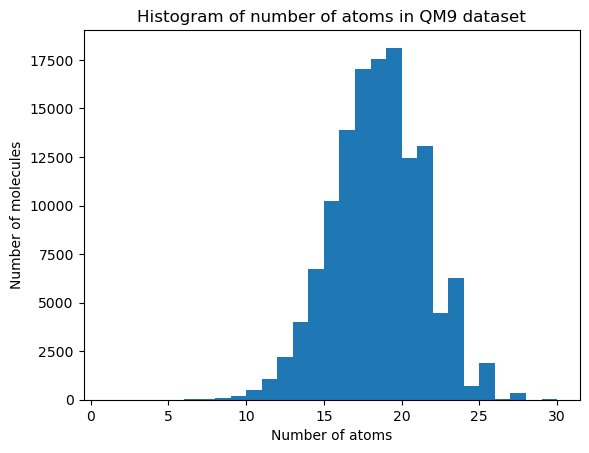

In [3]:
# plot a hist for N
import matplotlib.pyplot as plt
plt.hist(N, bins=range(1, 31))
plt.xlabel('Number of atoms')
plt.ylabel('Number of molecules')
plt.title('Histogram of number of atoms in QM9 dataset')
plt.show()

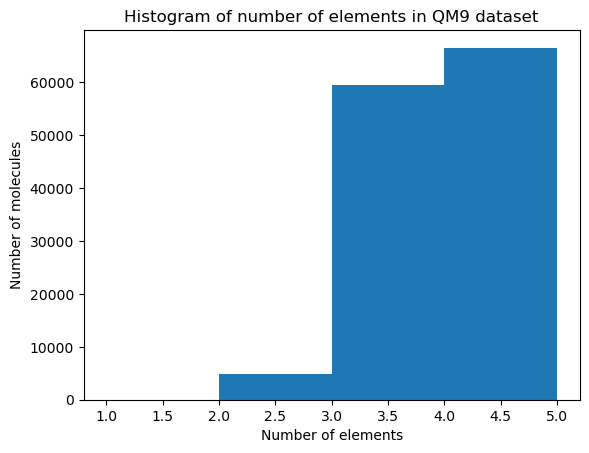

In [4]:
def Z_to_numofelements(Z):
    res_list = []
    for z in Z:
        z_ = set(z.tolist())
        res_list.append(len(z_))
    return res_list

num_of_elem = Z_to_numofelements(Z_qm9)

# plot a hist for num_of_elem
plt.hist(num_of_elem, bins=range(1, 6))
plt.xlabel('Number of elements')
plt.ylabel('Number of molecules')
plt.title('Histogram of number of elements in QM9 dataset')
plt.show()

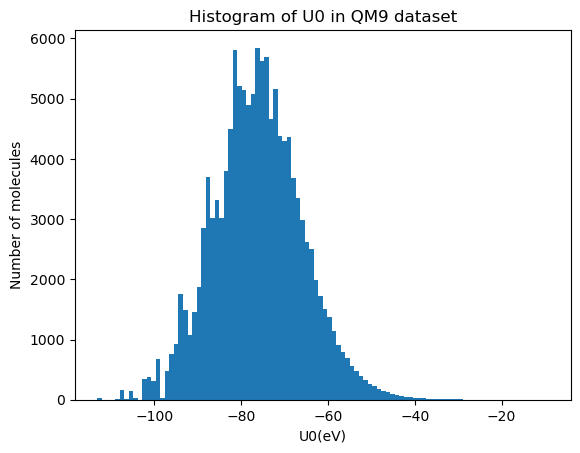

In [5]:
# histogram of U0
plt.hist(U0, bins=100)
plt.xlabel('U0(eV)')
plt.ylabel('Number of molecules')
plt.title('Histogram of U0 in QM9 dataset')
plt.show()


In [8]:
def Z_to_onehot(Z):
    res_list = []
    map_dict = {1:0, 6:1, 7:2, 8:3, 9:4}
    for z in Z:
        z_ = z.tolist()
        onehot = np.zeros(5)
        for i in z_:
            onehot[map_dict[i]] += 1
        res_list.append(onehot)
    # return res_list
    return np.array(res_list)

In [9]:
Z_onehot = Z_to_onehot(Z_qm9)

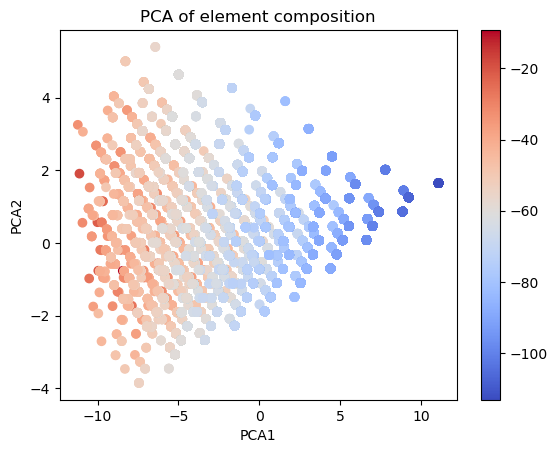

In [12]:
# PCA with dim=2 to Z_onehot, and plot the result, color by U0

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(Z_onehot)

plt.scatter(Z_pca[:,0], Z_pca[:,1], c=U0, cmap='coolwarm')
plt.colorbar()

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of element composition')
plt.show()


In [13]:
# give a coordinates to PCA, find the nearest molecule to the given coordinates
# and plot the molecule
def find_nearest_molecule(Z, R, U0, pca, x, y, print_=True):
    idx2element = {1:'H', 6:'C', 7:'N', 8:'O', 9:'F'}
    Z_pca = pca.transform(Z_to_onehot(Z))
    dist = (Z_pca[:,0]-x)**2 + (Z_pca[:,1]-y)**2
    idx = np.argmin(dist)
    xyz_text = ''
    xyz_text += f'{len(Z[idx])}\n'
    xyz_text += 'U0: ' + str(U0[idx]) +"; "
    xyz_text += f"coord: ({Z_pca[idx,0]:.2f}, {Z_pca[idx,1]:.2f})\n"
    for i in range(len(Z[idx])):
        xyz_text += f'{idx2element[int(Z[idx][i])]} {R[idx][i][0]} {R[idx][i][1]} {R[idx][i][2]}\n'
    if print_:
        print('The nearest molecule to the given coordinates is molecule', idx)
        # print('U0:', U0[idx])
        print(xyz_text)
        # print('Z:', Z[idx])
        # print('R:', R[idx])

    
    # return float(U0[idx]), xyz_text, (float(Z_pca[idx,0]), float(Z_pca[idx,1]))
    return xyz_text

In [14]:
# point1: (0, 0)

xyz_p1= find_nearest_molecule(Z_qm9, R_qm9, U0, pca, 0, 0, print_=False)

with open('point1.xyz', 'w') as f:
    f.write(xyz_p1)


In [15]:
# point2: (-10, -4)

xyz_p2= find_nearest_molecule(Z_qm9, R_qm9, U0, pca, -10, -4, print_=False)

with open('point2.xyz', 'w') as f:
    f.write(xyz_p2)


In [16]:
# point3: (-10, 4)

xyz_p3= find_nearest_molecule(Z_qm9, R_qm9, U0, pca, -10, 4, print_=False)

with open('point3.xyz', 'w') as f:
    f.write(xyz_p3)

In [17]:
# point4: (10, 2)

xyz_p4= find_nearest_molecule(Z_qm9, R_qm9, U0, pca, 10, 2, print_=False)

with open('point4.xyz', 'w') as f:
    f.write(xyz_p4)